In [ ]:
#✅ Lab 4 — Fuzzy Inference System (FIS) in Python (scikit-fuzzy)
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [ ]:
temperature = ctrl.Antecedent(np.arange(0, 101, 1), 'temperature')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')


In [ ]:
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 50])
temperature['hot'] = fuzz.trimf(temperature.universe, [30, 100, 100])
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [30, 100, 100])


In [ ]:
rule1 = ctrl.Rule(temperature['cold'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['hot'], fan_speed['high'])


In [ ]:
fan_ctrl = ctrl.ControlSystem([rule1, rule2])
fan = ctrl.ControlSystemSimulation(fan_ctrl)

fan.input['temperature'] = 70
fan.compute()


Fan Speed: 73.66666666666657


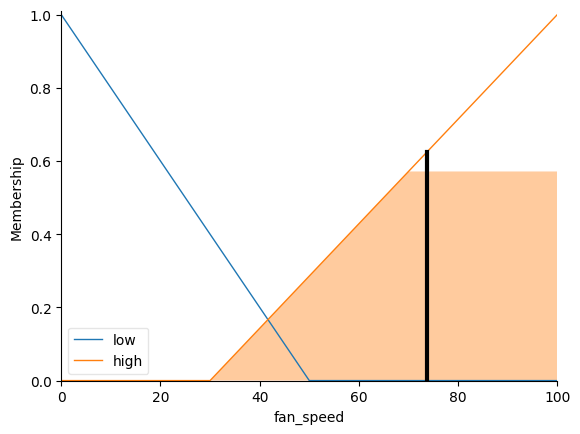

In [ ]:
print(f"Fan Speed: {fan.output['fan_speed']}")
fan_speed.view(sim=fan)
